<a href="https://colab.research.google.com/github/NicolasSanjaya/analisis-sentimen-colab/blob/main/analisissentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Library yang dibutuhkan

!pip install Sastrawi

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Baca data
# df = pd.read_csv('dataset.csv')
df = pd.read_csv('baru.csv')

# Tampilkan informasi dasar
print("Ukuran dataset:", df.shape)
print("Kolom dalam dataset:", df.columns.tolist())
print("5 data pertama:")
df.head()

Ukuran dataset: (2094, 2)
Kolom dalam dataset: ['full_text', 'sentiment']
5 data pertama:


,full_text,sentiment
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif


In [ ]:
#Install Library Untuk Tokenisasi

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Preprocessing
# 1. Mengambil kolom yang dibutuhkan
df = df[['full_text','sentiment']]

# Menghapus Data yang kosong
print(df.shape)
df = df.dropna(subset='full_text')
df = df.drop_duplicates(subset='full_text')
print(df.shape)

# 2. Case folding - mengubah teks menjadi lowercase
df['clean_text'] = df['full_text'].str.lower()

# Menyimpan File
df.to_csv('case_folding.csv', index=False)
df.head()

(2094, 2)
(2094, 2)


,full_text,sentiment,clean_text
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs. listyo sigit prab...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,@sunartoadhie32 @lambepaklurah @divhumas_polri...
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs. listyo sigit prab...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,@divhumas_polri perbaiki citra yg udah buruk d...


In [ ]:
# 3. Cleaning - menghapus URL, mention, hashtag, dan karakter non alfanumerik
def clean_text(text):
    if not isinstance(text, str):
      return "" # Return empty string or handle as appropriate
    # Menghapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Menghapus mention
    text = re.sub(r'@\w+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus RT dan FAV
    text = re.sub(r'\brt\b', '', text)
    # Menghapus karakter non alfanumerik kecuali spasi
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Mengganti &amp dengan kata dan
    text = text.replace('&amp', 'dan')
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

# Menyimpan File
df.to_csv('cleaning.csv', index=False)
df.head()

,full_text,sentiment,clean_text
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...


In [ ]:
df_filtered = df[df['clean_text'].str.contains(r'polri|polisi', case=False, na=False)]
df_filtered.to_csv('hasil_filter.csv', index=False)


In [ ]:
print(df_filtered.shape)

(2094, 3)


In [ ]:
df = pd.read_csv('hasil_filter.csv')
df.head()

,full_text,sentiment,clean_text
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...


In [ ]:
# 4. Normalization
# Fungsi untuk normalisasi kata (mengubah kata tidak baku ke baku)
slang_df = pd.read_csv("slang.csv")
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))

def normalize_text(text, slang_dict):
    # Tokenisasi kata dan normalisasi
    def replace_slang(word):
        return slang_dict.get(word.lower(), word)

    # Menggunakan regex untuk mempertahankan tanda baca
    words = re.findall(r'\b\w+\b|\S', text)
    normalized_words = [replace_slang(word) for word in words]
    return ' '.join(normalized_words)

df["normalization"] = df["clean_text"].apply(lambda x: normalize_text(x, slang_dict))

# Menyimpan File
df.to_csv('normalization.csv', index=False)
df.head()

,full_text,sentiment,clean_text,normalization
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...,pernyataan tersebut disampaikan oleh kapolri j...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...,polisi jujur itu baru oknum kalo yang enggak b...
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...,perbaiki citra yang sudah buruk dengan mengasi...


In [ ]:
# 5. Tokenizing
nltk.download('punkt', quiet=True)
df['tokens'] = df['normalization'].apply(nltk.tokenize.word_tokenize)

# Menyimpan File
df.to_csv('tokenizing.csv', index=False)
df.head()

,full_text,sentiment,clean_text,normalization,tokens
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...,pernyataan tersebut disampaikan oleh kapolri j...,"[pernyataan, tersebut, disampaikan, oleh, kapo..."
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit..."
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...,polisi jujur itu baru oknum kalo yang enggak b...,"[polisi, jujur, itu, baru, oknum, kalo, yang, ..."
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit..."
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...,perbaiki citra yang sudah buruk dengan mengasi...,"[perbaiki, citra, yang, sudah, buruk, dengan, ..."


In [ ]:
# 6. Stopword Removal
nltk.download('stopwords', quiet=True)

# Ambil daftar stopword bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    # Filter token yang bukan stopword
    return [word for word in tokens if word not in stop_words and len(word) > 2]

df['tokens_stopwords'] = df['tokens'].apply(remove_stopwords)

# Menyimpan File
df.to_csv('stopword_removal.csv', index=False)

df.head()

,full_text,sentiment,clean_text,normalization,tokens,tokens_stopwords
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...,pernyataan tersebut disampaikan oleh kapolri j...,"[pernyataan, tersebut, disampaikan, oleh, kapo...","[pernyataan, kapolri, jenderal, polisi, drs, l..."
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit..."
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...,polisi jujur itu baru oknum kalo yang enggak b...,"[polisi, jujur, itu, baru, oknum, kalo, yang, ...","[polisi, jujur, oknum, kalo, beres, oknum]"
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit..."
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...,perbaiki citra yang sudah buruk dengan mengasi...,"[perbaiki, citra, yang, sudah, buruk, dengan, ...","[perbaiki, citra, buruk, mengasih, bansos, bas..."


In [ ]:
# 7. Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

df['stemmed_tokens'] = df['tokens_stopwords'].apply(stem_tokens)
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Menampilkan contoh hasil preprocessing
print("\nContoh hasil preprocessing:")
for i in range(3):
    print(f"Original: {df['full_text'].iloc[i]}")
    print(f"Cleaned: {df['stemmed_text'].iloc[i]}")
    print("-" * 50)

# Menyimpan File
df.to_csv('stemming.csv', index=False)
df.head()


Contoh hasil preprocessing:
Original: Pernyataan tersebut disampaikan oleh Kapolri Jenderal Polisi Drs. Listyo Sigit Prabowo https://t.co/JFoOILZbb1. dalam acara Baksos Polri Presisi bersama mahasiswa aliansi Baamp Eksekutif Mahasiswa (BEM) amp Organisasi Kemasyarakatan Pemuda (OKP) https://t.co/7TyDUzVxkx
Cleaned: nyata kapolri jenderal polisi drs listyo sigit prabowo acara baksos polri presisi mahasiswa aliansi baamp eksekutif mahasiswa bem amp organisasi masyarakat pemuda okp
--------------------------------------------------
Original: Kapolri Jenderal Polisi Drs. Listyo Sigit Prabowo https://t.co/JFoOILZbb1. menegaskan komitmen Polri dalam mengawal kebebasan berpendapat mahasiswa amp organisasi kepemudaan (OKP). Kapolri juga mengapresiasi kolaborasi mahasiswa dengan Polri. https://t.co/MJznJtnawj
Cleaned: kapolri jenderal polisi drs listyo sigit prabowo komitmen polri awal bebas dapat mahasiswa amp organisasi pemuda okp kapolri apresiasi kolaborasi mahasiswa polri
----------------

,full_text,sentiment,clean_text,normalization,tokens,tokens_stopwords,stemmed_tokens,stemmed_text
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,pernyataan tersebut disampaikan oleh kapolri j...,pernyataan tersebut disampaikan oleh kapolri j...,"[pernyataan, tersebut, disampaikan, oleh, kapo...","[pernyataan, kapolri, jenderal, polisi, drs, l...","[nyata, kapolri, jenderal, polisi, drs, listyo...",nyata kapolri jenderal polisi drs listyo sigit...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit...",kapolri jenderal polisi drs listyo sigit prabo...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur itu baru oknum klo yg ga beres bu...,polisi jujur itu baru oknum kalo yang enggak b...,"[polisi, jujur, itu, baru, oknum, kalo, yang, ...","[polisi, jujur, oknum, kalo, beres, oknum]","[polisi, jujur, oknum, kalo, beres, oknum]",polisi jujur oknum kalo beres oknum
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...,kapolri jenderal polisi drs listyo sigit prabo...,"[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit...","[kapolri, jenderal, polisi, drs, listyo, sigit...",kapolri jenderal polisi drs listyo sigit prabo...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,perbaiki citra yg udah buruk dengan ngasih ban...,perbaiki citra yang sudah buruk dengan mengasi...,"[perbaiki, citra, yang, sudah, buruk, dengan, ...","[perbaiki, citra, buruk, mengasih, bansos, bas...","[baik, citra, buruk, asih, bansos, basi, asih,...",baik citra buruk asih bansos basi asih bansos ...


----------------------------------------------------------
##**Apabila Sudah Labeling & Preprocessing Bisa Langsung Proses Dibawah ini**

In [5]:
#+2 kalau array 0 berarti diexcel baris ke 2
import pandas as pd

data = pd.read_csv("baru.csv")
# data = pd.read_csv("chatgpt.csv")
# data = pd.read_csv("stemming.csv")

print(data.shape)
# pengecekan data kosong & duplikat lagi
data = data.drop_duplicates(subset='full_text')
data = data.dropna()
print(data.shape)

data

(2094, 3)
(2094, 3)


,full_text,sentiment,stemmed_text
0,Pernyataan tersebut disampaikan oleh Kapolri J...,netral,nyata kapolri jenderal polisi drs listyo sigit...
1,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
2,@sunartoadhie32 @lambepaklurah @DivHumas_Polri...,negatif,polisi jujur oknum kalo beres oknum
3,Kapolri Jenderal Polisi Drs. Listyo Sigit Prab...,positif,kapolri jenderal polisi drs listyo sigit prabo...
4,@DivHumas_Polri Perbaiki citra yg udah buruk d...,negatif,baik citra buruk asih bansos basi asih bansos ...
...,...,...,...
2089,Sosialisasi Rekrutmen Terpadu Polri di CFD Sem...,netral,sosialisasi rekrutmen padu polri cfd semarang ...
2090,Kapolri Apresiasi E-Learning Humas Polri Kadiv...,positif,kapolri apresiasi elearning humas polri kadiv ...
2091,@DivHumas_Polri Polisi Tokyo yang dimaksud??????,negatif,polisi tokyo
2092,Kumenamp @Geganaid @ahriesonta @DivHumas_Polri...,negatif,kumenamp ijin lanjut date baru miris wanita tu...


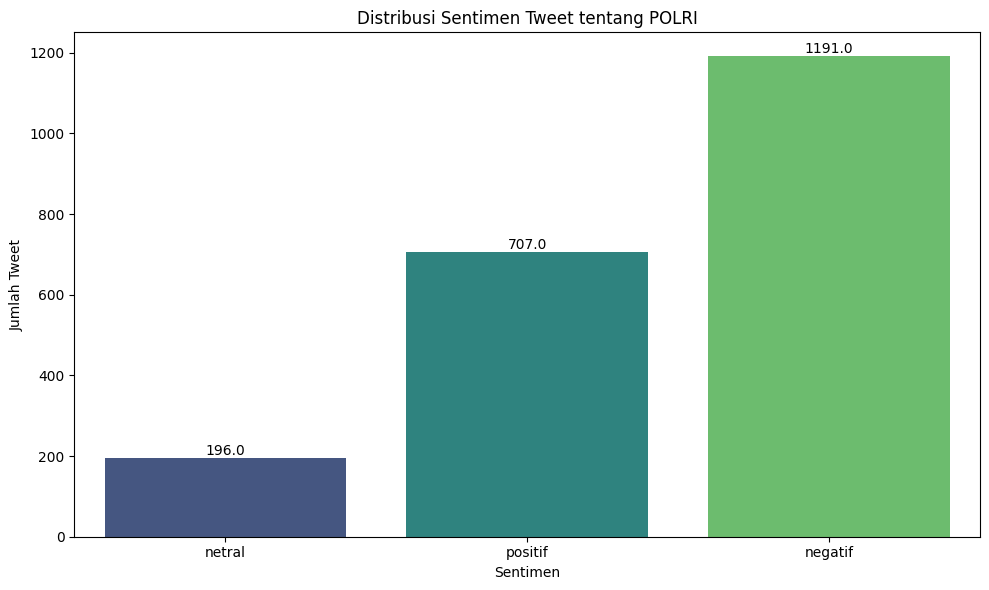

Persentase Sentimen:
negatif: 56.88%
positif: 33.76%
netral: 9.36%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualisasi hasil
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=data, palette='viridis', hue='sentiment')
plt.title('Distribusi Sentimen Tweet tentang POLRI')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')

# Tambahkan label jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('sentiment.png')
plt.show()

# Tampilkan persentase masing-masing sentimen
sentiment_percentage = data['sentiment'].value_counts(normalize=True) * 100
print("Persentase Sentimen:")
for label, percentage in sentiment_percentage.items():
    print(f"{label}: {percentage:.2f}%")

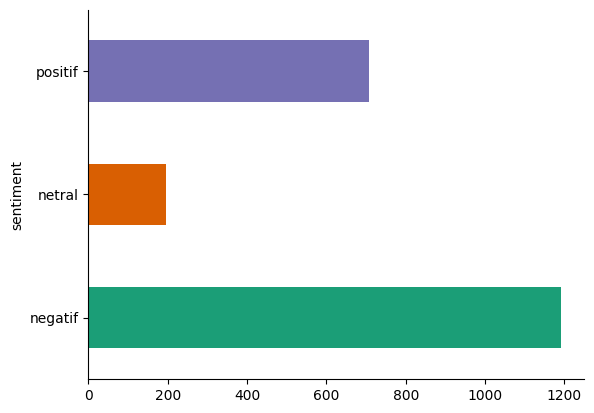

In [ ]:
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#7 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=8000)
# X = vectorizer.fit_transform(data['stemmed_text'])
X = data['stemmed_text']
y = data['sentiment']

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils.class_weight import compute_sample_weight


# 1. Pembagian dataset dengan stratified sampling terlebih dahulu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


print("\nSplit Data 90:10 dengan stratified sampling")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 2. Naive Bayes dengan parameter tuning
print("\n--- Optimasi Parameter Naive Bayes ---")
# Parameter grid untuk Naive Bayes
nb_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Grid search untuk menemukan parameter terbaik
nb_grid = GridSearchCV(
    MultinomialNB(),
    nb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
nb_grid.fit(X_train, y_train, sample_weight=sample_weights)

print(f"Parameter terbaik untuk Naive Bayes: {nb_grid.best_params_}")
best_nb = nb_grid.best_estimator_

# Menggunakan parameter terbaik untuk model final

# Model Dasar Multinomial NB
nb_classifier = MultinomialNB(
    alpha=nb_grid.best_params_['alpha'],
    fit_prior=nb_grid.best_params_['fit_prior']
)
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluasi model Naive Bayes
print("\nEvaluasi Model Naive Bayes Teroptimasi:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Visualisasi confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix - Optimized Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_optimized_nb.png')
plt.close()

# 3. AdaBoost dengan parameter tuning
print("\n--- Optimasi Parameter AdaBoost dengan Naive Bayes ---")
# Parameter grid untuk AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Base estimator menggunakan Naive Bayes dengan parameter terbaik

# Model Dasar Multinomial NB
base_nb = MultinomialNB(
    alpha=nb_grid.best_params_['alpha'],
    fit_prior=nb_grid.best_params_['fit_prior']
)

# Grid search untuk AdaBoost
try:
    ada_grid = GridSearchCV(
        AdaBoostClassifier(estimator=base_nb, random_state=42),
        ada_params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    ada_grid.fit(X_train, y_train, sample_weight=sample_weights)

    print(f"Parameter terbaik untuk AdaBoost: {ada_grid.best_params_}")

    # Membuat model final dengan parameter terbaik
    ada_classifier = AdaBoostClassifier(
        estimator=base_nb,
        n_estimators=ada_grid.best_params_['n_estimators'],
        learning_rate=ada_grid.best_params_['learning_rate'],
        random_state=42
    )
except Exception as e:
    print(f"Error pada grid search AdaBoost: {e}")
    print("Menggunakan parameter default untuk AdaBoost")
    # Fallback ke parameter default jika grid search gagal
    ada_classifier = AdaBoostClassifier(
        estimator=base_nb,
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    )

# Melatih model AdaBoost final
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

# Evaluasi model AdaBoost
print("\nEvaluasi Model AdaBoost dengan Naive Bayes Teroptimasi:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

# Visualisasi confusion matrix untuk AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix - Optimized AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_optimized_ada.png')
plt.close()

# 4. Cross-validation untuk estimasi performa yang lebih akurat
print("\n--- Cross-Validation Evaluation ---")
nb_cv_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
ada_cv_scores = cross_val_score(ada_classifier, X, y, cv=5, scoring='accuracy')

print(f"Naive Bayes CV Accuracy: {np.mean(nb_cv_scores):.4f} ± {np.std(nb_cv_scores):.4f}")
print(f"AdaBoost CV Accuracy: {np.mean(ada_cv_scores):.4f} ± {np.std(ada_cv_scores):.4f}")

# 5. Visualisasi perbandingan akurasi
models = ['Optimized Naive Bayes', 'Optimized AdaBoost + NB']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_ada)]
cv_accuracies = [np.mean(nb_cv_scores), np.mean(ada_cv_scores)]

plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
plt.bar(x + width/2, cv_accuracies, width, label='CV Accuracy')

plt.title('Perbandingan Akurasi Model Teroptimasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.savefig('optimized_accuracy_comparison.png')
plt.close()

# 6. Analisis kata-kata yang paling berpengaruh
feature_names = np.array(vectorizer.get_feature_names_out())

def plot_top_features(classifier, feature_names, classes=None, n=20):
    if hasattr(classifier, 'feature_log_prob_'):
        # Untuk Naive Bayes
        if classes is None:
            classes = classifier.classes_

        for i, sentiment in enumerate(classes):
            # Ambil log probabilitas fitur untuk kelas ini
            feature_probs = classifier.feature_log_prob_[i]

            # Sorting berdasarkan log probability tertinggi
            top_indices = np.argsort(feature_probs)[-n:]
            top_features = feature_names[top_indices]
            top_weights = feature_probs[top_indices]

            # Sorting ulang untuk visualisasi dari besar ke kecil
            idx_sorted = np.argsort(top_weights)
            top_features = top_features[idx_sorted]
            top_weights = top_weights[idx_sorted]

            plt.figure(figsize=(10, 8))
            sns.barplot(x=top_weights, y=top_features, hue=top_features, palette='viridis')
            plt.title(f'Top {n} Features for Class: {sentiment}')
            plt.xlabel('Log Probability')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.savefig(f'top_features_optimized_{sentiment}.png')
            plt.close()
    else:
        print("Feature importance visualization not implemented for this classifier type")

# Plot top features untuk Naive Bayes teroptimasi
print("\nGenerating feature importance visualizations...")
plot_top_features(nb_classifier, feature_names, n=20)


print("\nOptimasi selesai! Model dengan akurasi yang ditingkatkan siap digunakan.")

NameError: name 'X' is not defined

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score

# Kalibrasi Naive Bayes
calibrated_nb = CalibratedClassifierCV(estimator=nb_classifier, method='isotonic', cv=5)
calibrated_nb.fit(X_train, y_train)
y_proba_nb_cal = calibrated_nb.predict_proba(X_test)

# Kalibrasi AdaBoost
calibrated_ada = CalibratedClassifierCV(estimator=ada_classifier, method='isotonic', cv=5)
calibrated_ada.fit(X_train, y_train)
y_proba_ada_cal = calibrated_ada.predict_proba(X_test)

# Hitung ulang log loss dan AUC setelah kalibrasi
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y))

print("\n=== Setelah Kalibrasi ===")

# Naive Bayes
loss_nb_cal = log_loss(y_test, y_proba_nb_cal)
auc_nb_cal = roc_auc_score(y_test_bin, y_proba_nb_cal, average='macro', multi_class='ovr')
print(f"Log Loss Naive Bayes (calibrated): {loss_nb_cal}")
print(f"AUC Naive Bayes (calibrated): {auc_nb_cal}")

# AdaBoost
loss_ada_cal = log_loss(y_test, y_proba_ada_cal)
auc_ada_cal = roc_auc_score(y_test_bin, y_proba_ada_cal, average='macro', multi_class='ovr')
print(f"Log Loss AdaBoost (calibrated): {loss_ada_cal}")
print(f"AUC AdaBoost (calibrated): {auc_ada_cal}")



=== Setelah Kalibrasi ===
Log Loss Naive Bayes (calibrated): 0.4137564851840489
AUC Naive Bayes (calibrated): 0.909430090613658
Log Loss AdaBoost (calibrated): 0.35962146028518616
AUC AdaBoost (calibrated): 0.9425770043811487


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score, cohen_kappa_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

# Kalibrasi Naive Bayes
calibrated_nb = CalibratedClassifierCV(estimator=nb_classifier, method='isotonic', cv=5)
calibrated_nb.fit(X_train, y_train)
y_proba_nb_cal = calibrated_nb.predict_proba(X_test)
y_pred_nb_cal = calibrated_nb.predict(X_test)

# Kalibrasi AdaBoost
calibrated_ada = CalibratedClassifierCV(estimator=ada_classifier, method='isotonic', cv=5)
calibrated_ada.fit(X_train, y_train)
y_proba_ada_cal = calibrated_ada.predict_proba(X_test)
y_pred_ada_cal = calibrated_ada.predict(X_test)

# Binarisasi label
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_test_encoded = le.transform(y_test)
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_encoded))

print("\n=== Setelah Kalibrasi ===")

# === Naive Bayes ===
loss_nb_cal = log_loss(y_test, y_proba_nb_cal)
auc_nb_cal = roc_auc_score(y_test_bin, y_proba_nb_cal, average='macro', multi_class='ovr')
kappa_nb = cohen_kappa_score(y_test_encoded, le.transform(y_pred_nb_cal))

print(f"Log Loss Naive Bayes (calibrated): {loss_nb_cal}")
print(f"AUC Naive Bayes (calibrated): {auc_nb_cal}")
print(f"Cohen's Kappa Naive Bayes (calibrated): {kappa_nb}")

# === AdaBoost ===
loss_ada_cal = log_loss(y_test, y_proba_ada_cal)
auc_ada_cal = roc_auc_score(y_test_bin, y_proba_ada_cal, average='macro', multi_class='ovr')
kappa_ada = cohen_kappa_score(y_test_encoded, le.transform(y_pred_ada_cal))

print(f"Log Loss AdaBoost (calibrated): {loss_ada_cal}")
print(f"AUC AdaBoost (calibrated): {auc_ada_cal}")
print(f"Cohen's Kappa AdaBoost (calibrated): {kappa_ada}")



=== Setelah Kalibrasi ===
Log Loss Naive Bayes (calibrated): 0.4137564851840489
AUC Naive Bayes (calibrated): 0.909430090613658
Cohen's Kappa Naive Bayes (calibrated): 0.7349177330895795
Log Loss AdaBoost (calibrated): 0.35962146028518616
AUC AdaBoost (calibrated): 0.9425770043811487
Cohen's Kappa AdaBoost (calibrated): 0.7343627322690396


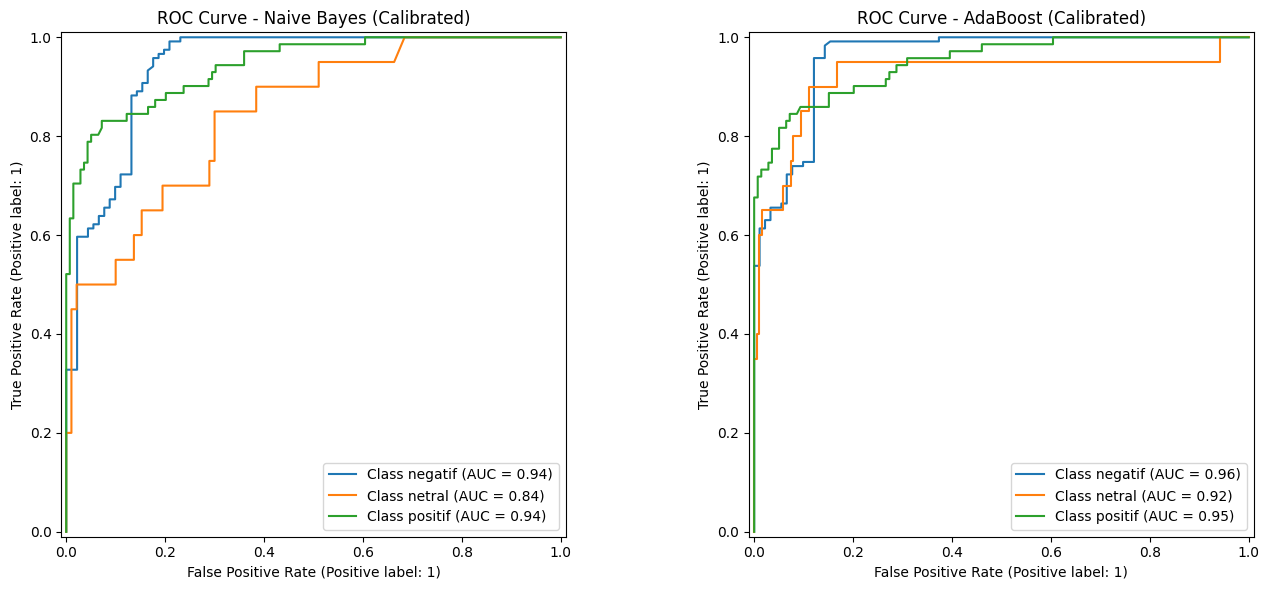

In [ ]:
# Plot ROC Curve untuk Naive Bayes dan AdaBoost
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC Naive Bayes
for i in range(y_test_bin.shape[1]):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_proba_nb_cal[:, i],
                                     name=f"Class {le.inverse_transform([i])[0]}", ax=axes[0])
axes[0].set_title("ROC Curve - Naive Bayes (Calibrated)")

# ROC AdaBoost
for i in range(y_test_bin.shape[1]):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_proba_ada_cal[:, i],
                                     name=f"Class {le.inverse_transform([i])[0]}", ax=axes[1])
axes[1].set_title("ROC Curve - AdaBoost (Calibrated)")

plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Simpan model Naive Bayes
joblib.dump(nb_classifier, 'naivebayes.pkl')
print("Model Naive Bayes disimpan sebagai 'naivebayes.pkl'")

# Simpan model AdaBoost + Naive Bayes
joblib.dump(ada_classifier, 'adaboost.pkl')
print("Model AdaBoost disimpan sebagai 'adaboost.pkl'")

joblib.dump(vectorizer, 'vectorizer.pkl')
print("Vectorizer disimpan sebagai 'vectorizer.pkl'")


Model Naive Bayes disimpan sebagai 'naivebayes.pkl'
Model AdaBoost disimpan sebagai 'adaboost.pkl'
Vectorizer disimpan sebagai 'vectorizer.pkl'


In [ ]:
import joblib
from sklearn.metrics import classification_report, accuracy_score
import time

# Load model dan vectorizer
nb_model_loaded = joblib.load('naivebayes.pkl')
ada_model_loaded = joblib.load('adaboost.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Optional: load test data untuk evaluasi
# Gantilah X_test dan y_test jika tidak tersedia
try:
    X_test_vector = X_test  # Misalnya data test sudah di-vectorize
    y_test_true = y_test

    # Prediksi pada data test
    y_test_pred = nb_model_loaded.predict(X_test_vector)

    print("=== Evaluasi Model Naive Bayes ===")
    print("Accuracy:", accuracy_score(y_test_true, y_test_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_true, y_test_pred))
except:
    print("Data uji tidak tersedia, hanya menggunakan input manual.")

# Loop interaktif untuk mengetik input
while True:
    user_input = input("\nKetik kalimat untuk dianalisis (atau ketik 'exit' untuk keluar): ")
    if user_input.lower() == 'exit':
        break

    # Preprocessing dan transform
    start_time = time.time()
    sample_vector = vectorizer.transform([user_input])

    # Prediksi dengan kedua model
    nb_pred = nb_model_loaded.predict(sample_vector)[0]
    ada_pred = ada_model_loaded.predict(sample_vector)[0]
    end_time = time.time()

    print("\nHasil Prediksi:")
    print(f"- Naive Bayes: {nb_pred}")
    print(f"- AdaBoost + NB: {ada_pred}")
    print(f"- Waktu proses: {end_time - start_time:.4f} detik")


=== Evaluasi Model Naive Bayes ===
Accuracy: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

     negatif       0.88      0.96      0.92       119
      netral       0.56      0.50      0.53        20
     positif       0.90      0.79      0.84        71

    accuracy                           0.86       210
   macro avg       0.78      0.75      0.76       210
weighted avg       0.86      0.86      0.85       210


Ketik kalimat untuk dianalisis (atau ketik 'exit' untuk keluar): polri tidak baik

Hasil Prediksi:
- Naive Bayes: positif
- AdaBoost + NB: positif
- Waktu proses: 0.0249 detik

Ketik kalimat untuk dianalisis (atau ketik 'exit' untuk keluar): polisi tidak baik

Hasil Prediksi:
- Naive Bayes: positif
- AdaBoost + NB: positif
- Waktu proses: 0.0152 detik

Ketik kalimat untuk dianalisis (atau ketik 'exit' untuk keluar): polisi baik

Hasil Prediksi:
- Naive Bayes: negatif
- AdaBoost + NB: negatif
- Waktu proses: 0.0136 detik

Ket

In [ ]:
# Wordcloud untuk masing-masing sentimen
from wordcloud import WordCloud
from IPython.display import Image, display

def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

    # Tampilkan hasilnya langsung di Colab
    display(Image(filename))

# Wordcloud untuk masing-masing sentimen
for sentiment in data['sentiment'].unique():
    text = ' '.join(data[data['sentiment'] == sentiment]['stemmed_text'])
    generate_wordcloud(text, f'Wordcloud untuk Sentimen {sentiment.capitalize()}', f'wordcloud_{sentiment}.png')

print("Analisis sentimen selesai!")